In [66]:
from scipy.integrate import solve_ivp
from data.budworm import budworm_ode, simulate_steady_state
from sympy import symbols, Eq, solve, simplify
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch

In [60]:
def get_roots():
    """
    roots of descriminant of associated ode cubic in k.
    """
    r, k = symbols('r k', positive=True)
    a = r/k
    b = -r
    c = (k+r)/k
    d = -r
    p = (3*a*c-b**2) / (3*a**2)
    q = (2*b**3 - 9*a*b*c+27*a**2*d) / (27*a**3)
    
    D = - (4*p**3 + 27*q**2)
    D = simplify(D)
    
    
    D_fixed = D.subs(r, 0.56)
    r1, r2 = solve(Eq(D_fixed, 0), k)
    return r1, r2


In [61]:
r1, r2 = get_roots()
k_vals = np.linspace(float(r1)-1, float(r2)+1,250)

In [62]:
x0 = 1

k_start = k_vals[0]
k_end = k_vals[-1]
n_points = 250

k_increase = np.linspace(k_start,k_end, n_points)
k_decrease = np.linspace(k_increase[-1],k_start,n_points)

In [63]:
x_increase = simulate_steady_state(k_increase,x0=x0)
x_decrease = simulate_steady_state(k_decrease, x0=x_increase[-1])

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

In [64]:
X = np.hstack((x_increase,x_decrease))
K = np.hstack((k_increase, k_decrease))

repeat = 2
for _ in range(repeat):
    X = np.hstack((X,X))
    K = np.hstack((K,K))

tau = torch.arange(0, len(K), device = 'cpu')

In [95]:
device = 'cpu'
sample_rate = 10
noise = 0.1
scaler = MinMaxScaler(feature_range=(-1,1))
X_scaled = scaler.fit_transform(X.reshape(-1,1))
X_scaled = torch.tensor(X_scaled,dtype=torch.float32, device=device)

tau_train = tau[::sample_rate]
X_train = X_scaled[tau_train]
K_train = K[tau_train]

noise_arr = torch.randn_like(X_train) * noise
X_train = X_train + noise_arr

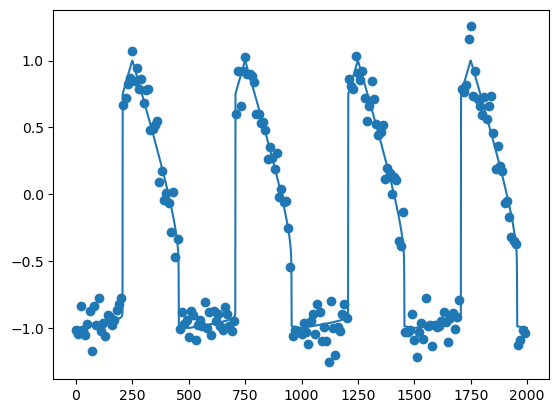

In [96]:
plt.plot(X_scaled)
plt.scatter(tau_train, X_train)

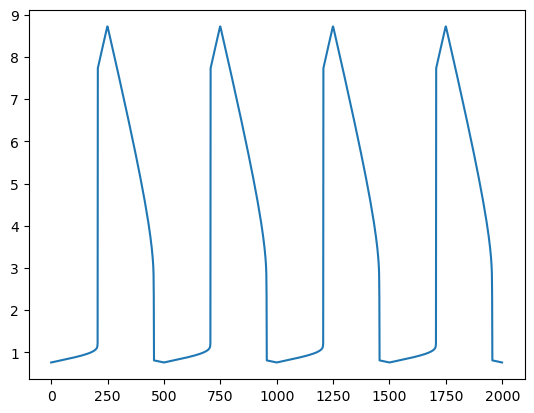

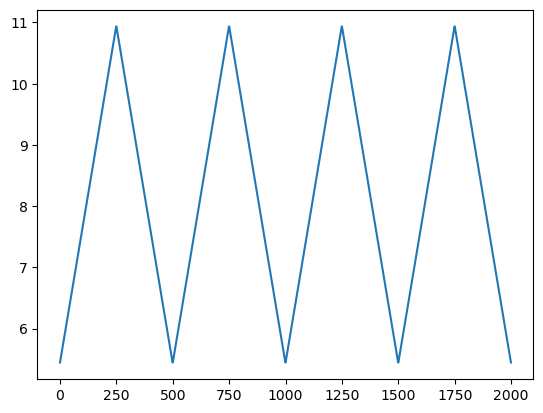

In [49]:
plt.plot(X)
plt.show()
plt.plot(K)

# All $t$ values

In [15]:
x0=1
r=0.56
k_start = k_vals[0]
k_end = k_vals[-1]
n_points = 250

k_increase = np.linspace(k_start,k_end, n_points)
k_decrease = np.linspace(k_increase[-1],k_start,n_points)
k = k_increase[0]

In [16]:
tspan = [0,50]
x_curr = x0
t_eval = np.linspace(tspan[0], tspan[-1], 51)


In [19]:
from data.utils import _load_wrapper
def simulate_steady_state(k_evals, x0,t_eval: None,show_progress:bool = True):

    wrapper = _load_wrapper(show_progress)
    t_span = [0,50]
    if t_eval is None:
        t_eval = [t_span[-1]]
    r=0.56
    x_vals = []
    t_vals = []
    k_vals = []
    dt = t_eval[1] - t_eval[0]
    x_curr = x0
    for idx, k in enumerate(wrapper(k_evals)):
        sol = solve_ivp(budworm_ode, t_span=t_span, y0=[x_curr],args = (r,k,), t_eval=t_eval)
        xi = sol.y[0][:-1]
        x_curr = xi[-1]
        
        x_vals = np.hstack((x_vals,xi))
        if idx > 0:
            shift = dt
        else:
            shift = 0
        t_vals = np.hstack((t_vals, sol.t[:-1]+idx*t_span[-1]+shift))
        k_vals = np.hstack((k_vals, [k]*len(t_eval[:-1])))
        
    return x_vals, t_vals, k_vals

In [26]:
x_increase, ts, ks = simulate_steady_state(k_increase,1,t_eval)
x_decrease, ts2, ks2 = simulate_steady_state(k_decrease, x0 = x_increase[-1],t_eval=t_eval)
ts2 += ts[-1]


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

In [37]:
X = np.hstack((x_increase, x_decrease))
T = np.hstack((ts, ts2))
K = np.hstack((ks,ks2))

repeat = 2
for _ in range(repeat):
    X = np.hstack((X,X))
    t1 = T[-1]
    T = np.hstack((T, T+t1))
    K = np.hstack((K,K))

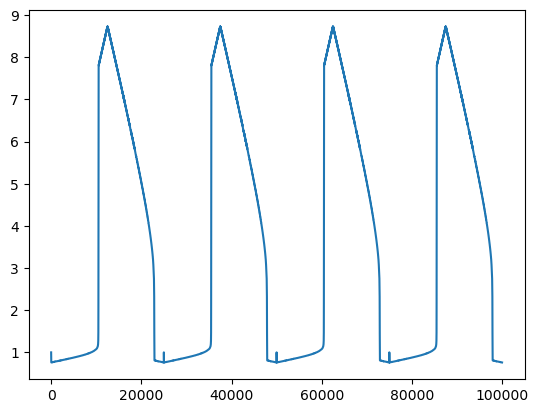

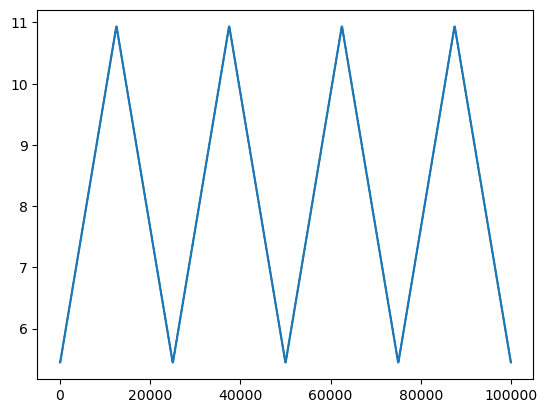

In [38]:
plt.plot(T, X)
plt.show()
plt.plot(T,K)
plt.show()

In [56]:
dt = sol.t[1] - sol.t[0]
len(sol.t)
count=3
t_eval[:-1]+count*50+dt

array([150.2, 150.4, 150.6, 150.8, 151. , 151.2, 151.4, 151.6, 151.8,
       152. , 152.2, 152.4, 152.6, 152.8, 153. , 153.2, 153.4, 153.6,
       153.8, 154. , 154.2, 154.4, 154.6, 154.8, 155. , 155.2, 155.4,
       155.6, 155.8, 156. , 156.2, 156.4, 156.6, 156.8, 157. , 157.2,
       157.4, 157.6, 157.8, 158. , 158.2, 158.4, 158.6, 158.8, 159. ,
       159.2, 159.4, 159.6, 159.8, 160. , 160.2, 160.4, 160.6, 160.8,
       161. , 161.2, 161.4, 161.6, 161.8, 162. , 162.2, 162.4, 162.6,
       162.8, 163. , 163.2, 163.4, 163.6, 163.8, 164. , 164.2, 164.4,
       164.6, 164.8, 165. , 165.2, 165.4, 165.6, 165.8, 166. , 166.2,
       166.4, 166.6, 166.8, 167. , 167.2, 167.4, 167.6, 167.8, 168. ,
       168.2, 168.4, 168.6, 168.8, 169. , 169.2, 169.4, 169.6, 169.8,
       170. , 170.2, 170.4, 170.6, 170.8, 171. , 171.2, 171.4, 171.6,
       171.8, 172. , 172.2, 172.4, 172.6, 172.8, 173. , 173.2, 173.4,
       173.6, 173.8, 174. , 174.2, 174.4, 174.6, 174.8, 175. , 175.2,
       175.4, 175.6,

In [33]:
# test = []
test = np.hstack((test,xi))

In [36]:
type(test)

numpy.ndarray

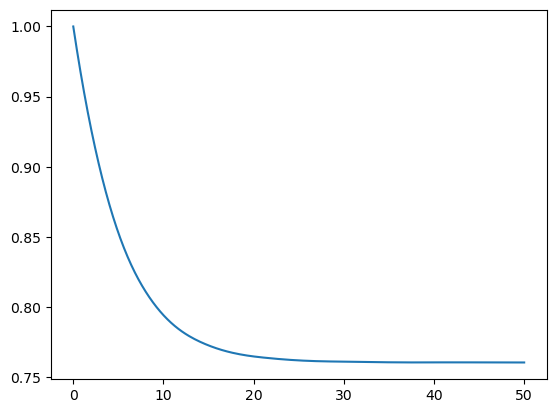

In [20]:
plt.plot(sol.t.reshape(-1),sol.y.reshape(-1))

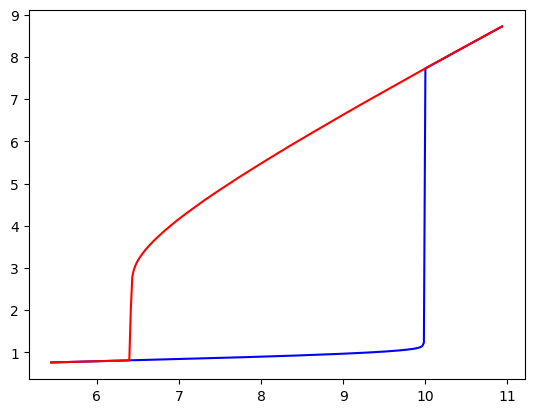

In [7]:
plt.plot(k_increase, x_increase, c='blue', label=r"increasing $k$")
plt.plot(k_decrease, x_decrease, c='red', label=r"decreasing $k$")
plt.show()